In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime
import os
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sb
plt.style.use('seaborn-whitegrid')

In [2]:
def get_jsons_from_dir(con):
#     base_dir = '../SAAF/test/history/cache_bench_test-cb_exp_{}-0MBs-run0-1/'
    base_dir = '../6.22/data/cache_bench_test-cb_exp_{}-0MBs-run0-1/'
    cur_dir = base_dir.format(con)
    file_names = os.listdir(cur_dir)
    results = []
    for fname in file_names:
        with open(cur_dir + fname, 'r') as f:
            results.append(json.load(f))
    return results

In [3]:
raw_data = list(map(get_jsons_from_dir, range(1, 31)))

In [4]:
cpuSteals_avg = []
for i in range(30):
    tmp = 0
    for j in raw_data[i]:
        tmp += float(j['cpuSteal'])
    tmp = tmp / len(raw_data[i])
    cpuSteals_avg.append(tmp)

In [5]:
cpuSteals_avg

[1660.0,
 1890.0,
 2533.3333333333335,
 2945.0,
 3196.0,
 3570.0,
 3997.1428571428573,
 4331.25,
 4785.555555555556,
 5527.0,
 6370.0,
 7061.666666666667,
 6900.7692307692305,
 7562.857142857143,
 8057.333333333333,
 7490.0,
 8307.64705882353,
 7845.555555555556,
 8628.947368421053,
 8603.0,
 8650.0,
 8577.727272727272,
 7573.913043478261,
 8894.583333333334,
 9633.6,
 9084.23076923077,
 10086.296296296296,
 11136.42857142857,
 11221.724137931034,
 10239.333333333334]

In [6]:
x = list(range(1, 31))

In [7]:
plt.rcParams["figure.figsize"] = (10,8)

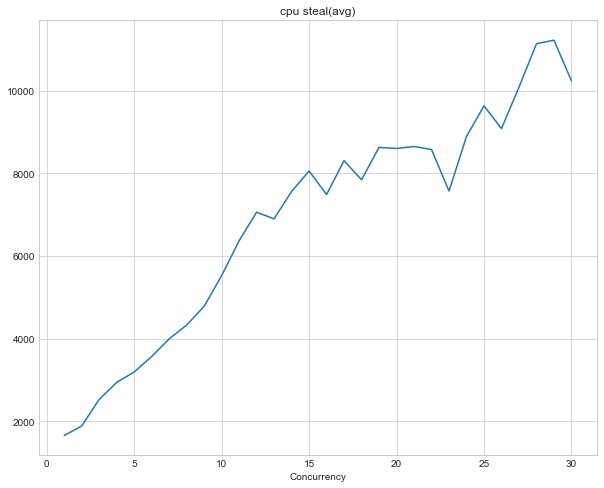

In [8]:
plt.title('cpu steal(avg)')
# y = parse_raw_data(raw_data, lambda i: i[0][0])
plt.xlabel('Concurrency')
# plt.ylabel('')
plt.plot(x, cpuSteals_avg)

In [9]:
raw_data[3][0]['cache_bench_metric'].split('\\n')[49]

'[2022-06-22 01:20:13.308230] 1073741824      0.84            9080.18         0.99           '

In [22]:
raw_data[3][2]['cache_bench_metric'].split('\\n')[-6:-1]

['[2022-06-22 01:20:13.121194] 1073741824      0.79            9604.11         1.00           ',
 '[2022-06-22 01:20:18.225741] 1610612736      0.79            9643.09         1.00           ',
 '[2022-06-22 01:20:23.360394] 2147483648      0.80            9586.51         1.01           ',
 '[2022-06-22 01:20:28.493516] 3221225472      0.80            9589.48         1.00           ',
 '[2022-06-22 01:20:33.614676] 4294967296      0.79            9611.77         1.00           ']

In [32]:
def get_throughput_avg(data):
    rows = data['cache_bench_metric'].split('\\n')[-6:-1]
    rows = map(lambda i: float(i.split()[-2]), rows)
    return sum(rows)/5

In [33]:
get_throughput_avg(raw_data[3][2])

9606.992000000002

In [34]:
throughput_avg = []
for i in range(30):
    tmp = 0
    for j in raw_data[i]:
        tmp += get_throughput_avg(j)
    tmp = tmp / len(raw_data[i])
    throughput_avg.append(tmp)

In [10]:
one_gb_throughput_avg = []
for i in range(30):
    tmp = 0
    for j in raw_data[i]:
        tmp += float(j['cache_bench_metric'].split('\\n')[49].split()[-2])
    tmp = tmp / len(raw_data[i])
    one_gb_throughput_avg.append(tmp)

In [44]:
throughput_avg

[9122.841999999999,
 8909.661,
 8909.614,
 9050.791500000001,
 8962.7732,
 9031.092333333332,
 9066.612857142856,
 9016.421999999999,
 9019.50488888889,
 8984.961800000001,
 8987.582363636364,
 8976.849166666665,
 9043.248000000001,
 9032.098000000002,
 9044.077733333335,
 8999.319375000001,
 8991.61388235294,
 8971.553666666667,
 8966.281473684208,
 8853.2277,
 8910.869809523807,
 8871.07990909091,
 8903.830086956523,
 8924.294666666667,
 8930.247119999998,
 8957.45523076923,
 8939.204814814815,
 8879.714142857143,
 8905.502827586206,
 8966.259533333334]

In [40]:
(1 - throughput_avg[-1] / throughput_avg[0])  * 100

1.7163781491191576

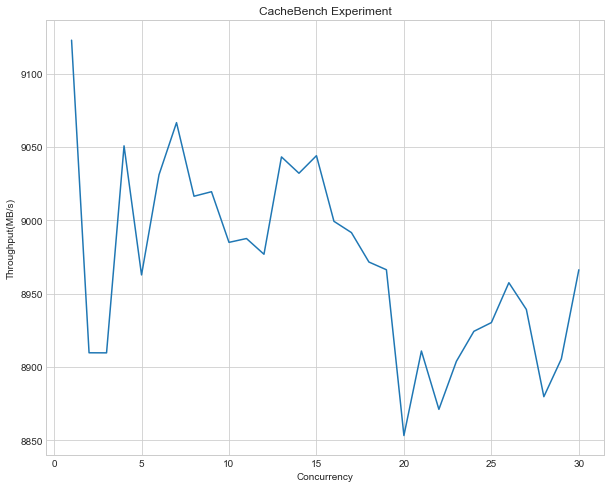

In [38]:
plt.title('CacheBench Experiment')
# y = parse_raw_data(raw_data, lambda i: i[0][0])
plt.xlabel('Concurrency')
plt.ylabel('Throughput(MB/s)')
plt.plot(x, throughput_avg)

In [13]:
list(map(lambda i: float(i.split()[-2]), raw_data[3][0]['cache_bench_metric'].split('\\n')[5:-1]))

[11256.17,
 11425.76,
 11511.9,
 10334.56,
 10684.5,
 10999.92,
 11176.59,
 11359.24,
 11475.03,
 11584.61,
 11634.31,
 11676.89,
 11699.31,
 11728.06,
 11740.07,
 11753.94,
 11758.05,
 11778.03,
 11821.31,
 11795.7,
 11777.07,
 11782.53,
 11773.86,
 11752.71,
 11737.49,
 11744.57,
 11780.42,
 11766.68,
 11729.5,
 11641.69,
 11621.63,
 11255.48,
 10590.27,
 9690.86,
 9204.01,
 9283.4,
 9239.07,
 9120.94,
 9031.38,
 9052.12,
 9114.93,
 9118.6,
 9079.62,
 9024.27,
 9080.18,
 9085.28,
 9057.62,
 9059.44,
 9048.74]

In [14]:
def get_throughput_by_concurrency(con, raw_data):
    data = raw_data[con-1]
    ret = []
    for d in data:
        ret.extend(list(map(lambda i: float(i.split()[-2]), raw_data[3][0]['cache_bench_metric'].split('\\n')[5:-1])))
    return np.array(ret)

In [15]:
def ttest(con1, con2, raw_data):
    a = get_throughput_by_concurrency(con1, raw_data)
    b = get_throughput_by_concurrency(con2, raw_data)
    return stats.ttest_ind(a, b, equal_var=False)

In [16]:
ttest_result = ttest(4, 27, raw_data)

In [17]:
ttest_result.pvalue

0.9999999999999837

In [18]:
for i in range(1, 31):
    for j in range(i+1, 31):
        ttest_result = ttest(i, j, raw_data)
        if ttest_result.pvalue <= 0.9:
            print ('{}, {}: pvalue: {}'.format(i, j, ttest_result.pvalue))

In [54]:
def get_avg_data(func):
    throughput_avg = []
    for i in range(30):
        tmp = 0
        for j in raw_data[i]:
            tmp += func(j)
        tmp = tmp / len(raw_data[i])
        throughput_avg.append(tmp)
    return throughput_avg

def get_data(func):
    throughput_avg = []
    for i in range(30):
#         tmp = 0
        for j in raw_data[i]:
            throughput_avg.append(func(j))
#         tmp = tmp / len(raw_data[i])
#         throughput_avg.append(tmp)
    return throughput_avg

In [46]:
raw_data[3][2]['cpuStealDelta']

'110.0'

In [51]:
int(raw_data[3][2]['runtime']) / 60000

4.15855

In [65]:
raw_data[3][2]['pageFaultsDelta']

'1054601'

In [62]:
throughput_data = get_data(get_throughput_avg)

In [59]:
cpuSteal_data = get_data(lambda i: float(i['cpuStealDelta']) / (int(i['runtime']) / 60000))
pageFaults_data = get_data(lambda i: float(i['pageFaultsDelta']) / (int(i['runtime']) / 60000))

In [61]:
cpuSteal_data[:5]

[62.57320262486562,
 74.38423054312486,
 220.59705071334375,
 79.4816830848527,
 144.22556878958693]

In [70]:
kendalltau(throughput_data, cpuSteal_data)

KendalltauResult(correlation=-0.3909343715239154, pvalue=2.1751058891916898e-36)

In [86]:
metric_list = ['cpuUserDelta', 'cpuKernelDelta', 'cpuIdleDelta', 'cpuIOWaitDelta', 'cpuSoftIrqDelta', 'cpuStealDelta', 'pageFaultsDelta']

In [87]:
metric_data_list = []
for i in metric_list:
    metric_data_list.append(get_data(lambda a: float(a[i]) / (int(a['runtime']) / 60000)))

In [88]:
len(metric_data_list)

7

In [90]:
pearson_co_results = []
for i in range(7):
    pearson_co_results.append(pearsonr(throughput_data, metric_data_list[i]))

In [91]:
pearson_co_results

[(0.2921320606543195, 1.3345533652067472e-10),
 (-0.07477357197157221, 0.10732760312381337),
 (0.05511193767349265, 0.23557135653011652),
 (-0.04725023226302261, 0.3092852609233308),
 (0.03329539037850007, 0.47384115677498295),
 (-0.4941655513015718, 5.289895138737907e-30),
 (0.08759018456769918, 0.0591163039275447)]

In [99]:
pearson_co, pearson_p_value = list(zip(*pearson_co_results))

In [100]:
pearson_co

(0.2921320606543195,
 -0.07477357197157221,
 0.05511193767349265,
 -0.04725023226302261,
 0.03329539037850007,
 -0.4941655513015718,
 0.08759018456769918)

In [101]:
pearson_p_value

(1.3345533652067472e-10,
 0.10732760312381337,
 0.23557135653011652,
 0.3092852609233308,
 0.47384115677498295,
 5.289895138737907e-30,
 0.0591163039275447)

In [110]:
metric_list = ['CPU User', 'CPU Kernel', 'CPU Idle', 'CPU IO Wait', 'CPU SoftIrq', 'CPU Steal', 'Page Faults']

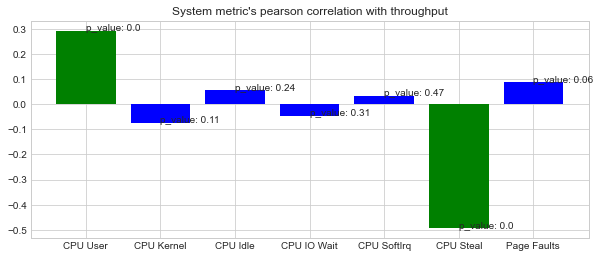

In [119]:
plt.rcParams["figure.figsize"] = (10,4)

color_list = ['green' if i < 0.05 else 'blue' for i in pearson_p_value]
plt.bar(metric_list,pearson_co , color=color_list)
plt.title("System metric's pearson correlation with throughput")
for i in range(len(metric_list)):
    plt.text(metric_list[i], pearson_co[i], 'p_value: {}'.format(round(pearson_p_value[i], 2)))
plt.show()

In [113]:
output_df = pd.DataFrame({'throughput': throughput_data, 'cpuSteal': metric_data_list[-2], 'pageFaults': metric_data_list[-1], 'cpuUser': metric_data_list[0] })

In [115]:
output_df.to_csv('/Users/ruochenwang/Downloads/output.csv')